In [82]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import numpy as np
import seaborn as sns

from textstat import flesch_kincaid_grade

In [44]:
df = pd.read_pickle("../data/clean_data.pkl")

print("No of rows in df: ", df.shape[0], "\n")
print("Data range: ", min(df['date']), " to ", max(df['date']), "\n")
print("Counts of each category: \n", df['variable'].value_counts(), "\n")
print("Column names:", ', '.join(df.columns), "\n")


No of rows in df:  175 

Data range:  01/26/2022  to  12/19/2018 

Counts of each category: 
 variable
fomc_statements    48
fomc_impnotes      44
fomc_minutes       43
fomc_presconf      40
Name: count, dtype: int64 

Column names: id, date, source, text, title, chairman, variable, clean_text 



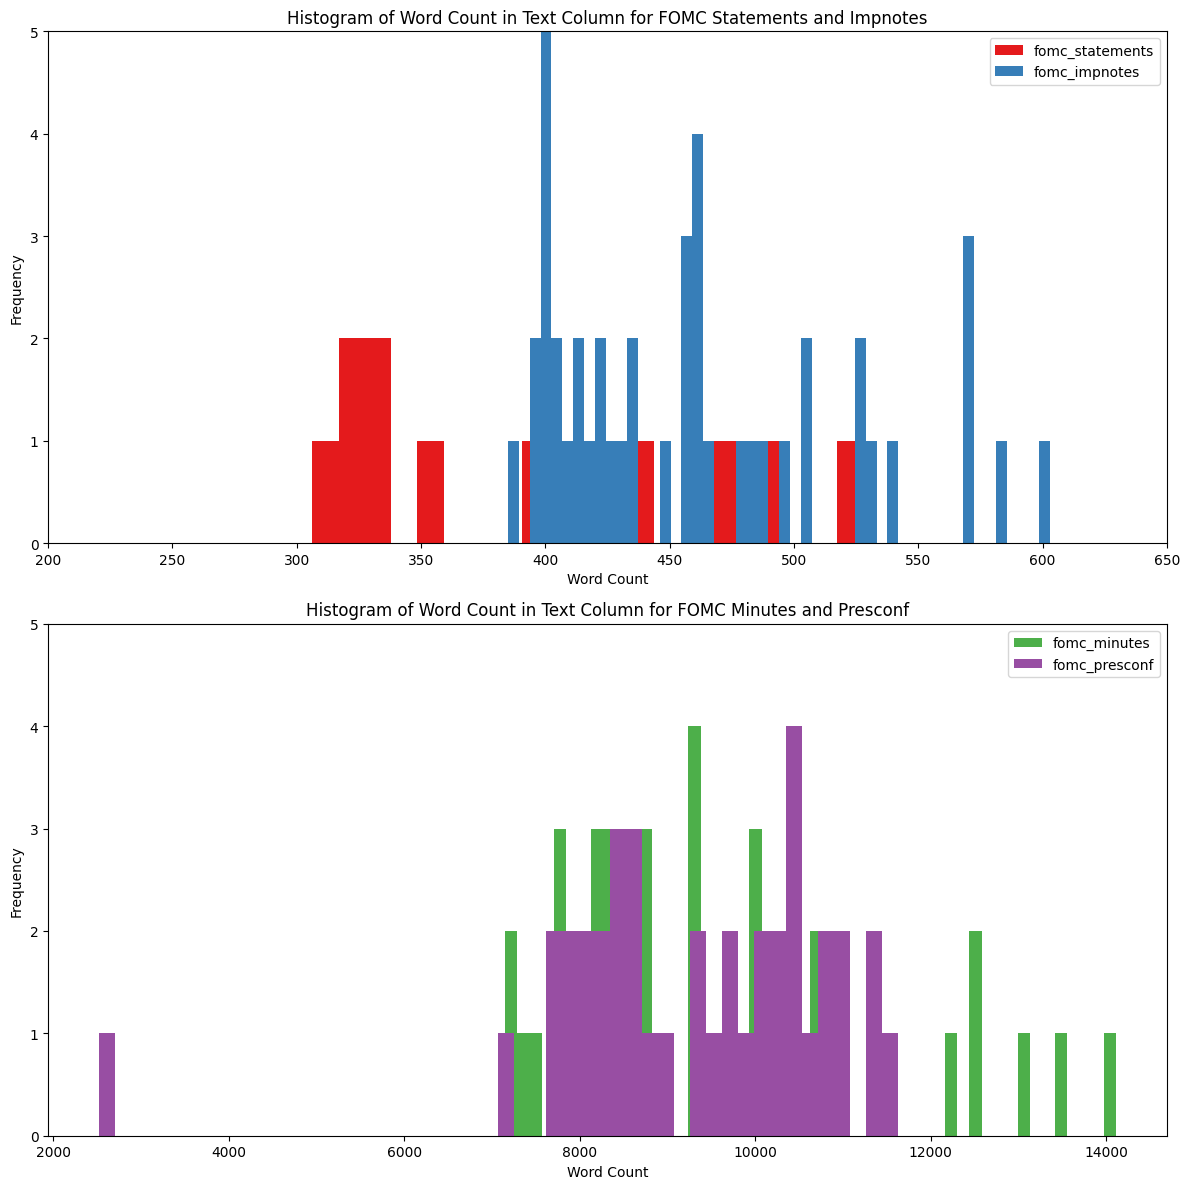

In [69]:

# Create a new column in the DataFrame that calculates the word count of the 'clean_text' field
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Define the color palette
color_palette = sns.color_palette("Set1", n_colors=4)

# Set of variables for each histogram
variables1 = ['fomc_statements', 'fomc_impnotes']
variables2 = ['fomc_minutes', 'fomc_presconf']

# Create two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

for variable, color in zip(variables1, color_palette[:2]):
    subset = df[df['variable'] == variable]
    ax[0].hist(subset['word_count'], bins=50, label=variable, color=color)

for variable, color in zip(variables2, color_palette[2:]):
    subset = df[df['variable'] == variable]
    ax[1].hist(subset['word_count'], bins=50, label=variable, color=color)

# Set the title and labels for the first subplot
ax[0].set_title('Histogram of Word Count in Text Column for FOMC Statements and Impnotes')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')
ax[0].set_ylim(0,5)
ax[0].set_xlim(200,650)
ax[0].legend()

# Set the title and labels for the second subplot
ax[1].set_title('Histogram of Word Count in Text Column for FOMC Minutes and Presconf')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0,5)
ax[1].legend()

plt.tight_layout()
plt.show()



In [70]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_keyword_frequency(df, keywords):
    # Function to count keywords in a given text
    def count_keywords(text, keywords):
        count = 0
        for keyword in keywords:
            count += len(re.findall(r'\b' + re.escape(keyword) + r'\b', text))
        return count

    # Apply the function to the 'text' column
    df['keywords_count'] = df['clean_text'].apply(lambda text: count_keywords(text, keywords))

    df['date'] = pd.to_datetime(df['date'])
    # Group by date and sum the counts
    df_grouped = df.groupby('date')['keywords_count'].sum().reset_index()

    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # Define bar positions on the x-axis
    bar_positions = np.arange(len(df_grouped['date']))

    # Adjust the width of bars (0.8 by default)
    bar_width = 0.4

    # Plotting a bar chart
    plt.bar(bar_positions, df_grouped['keywords_count'], width=bar_width, color='steelblue', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Frequency of Keywords')
    plt.title('Frequency of ' + keywords[0] + ' related topics')

    plt.xticks(bar_positions, df_grouped['date'], rotation=45, ha='right', fontsize=8)  # Set x-axis tick labels

    # Add grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()  # Ensure all elements are properly fit in the figure

    plt.show()




In [71]:
df1 = df[df['variable'] == 'fomc_minutes']


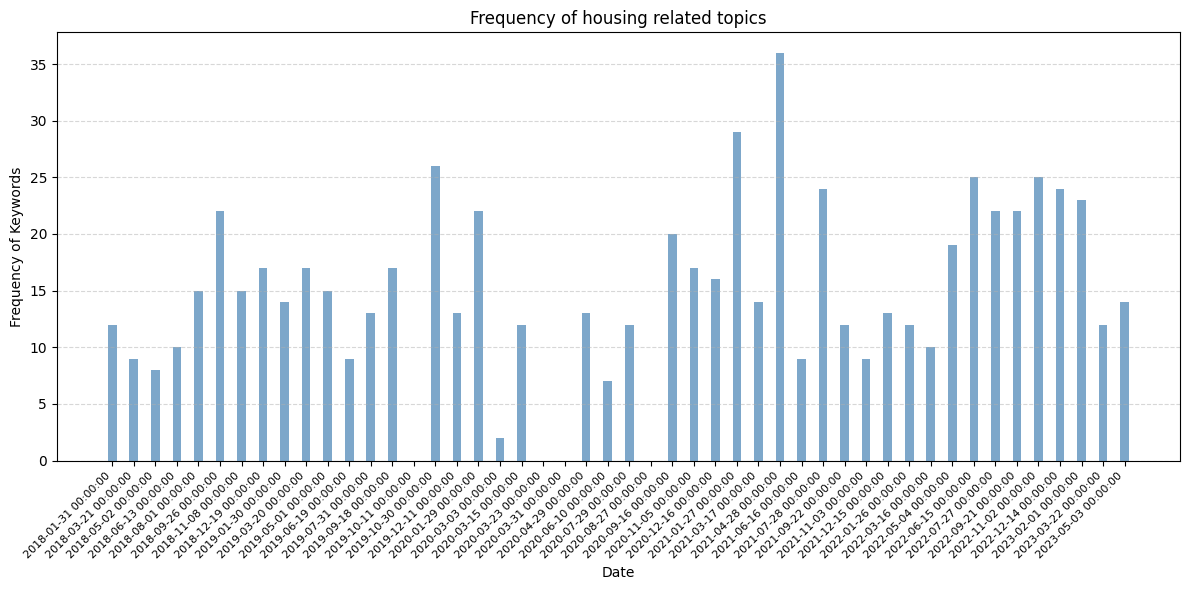

In [73]:
plot_keyword_frequency(df, ["housing", "household","real estate","homeless","home"])

/var/folders/r4/k_80bgh14hgf6lf0xrxfztjr0000gq/T/ipykernel_688/876459503.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords_count'] = df['clean_text'].apply(lambda text: count_keywords(text, keywords))
/var/folders/r4/k_80bgh14hgf6lf0xrxfztjr0000gq/T/ipykernel_688/876459503.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


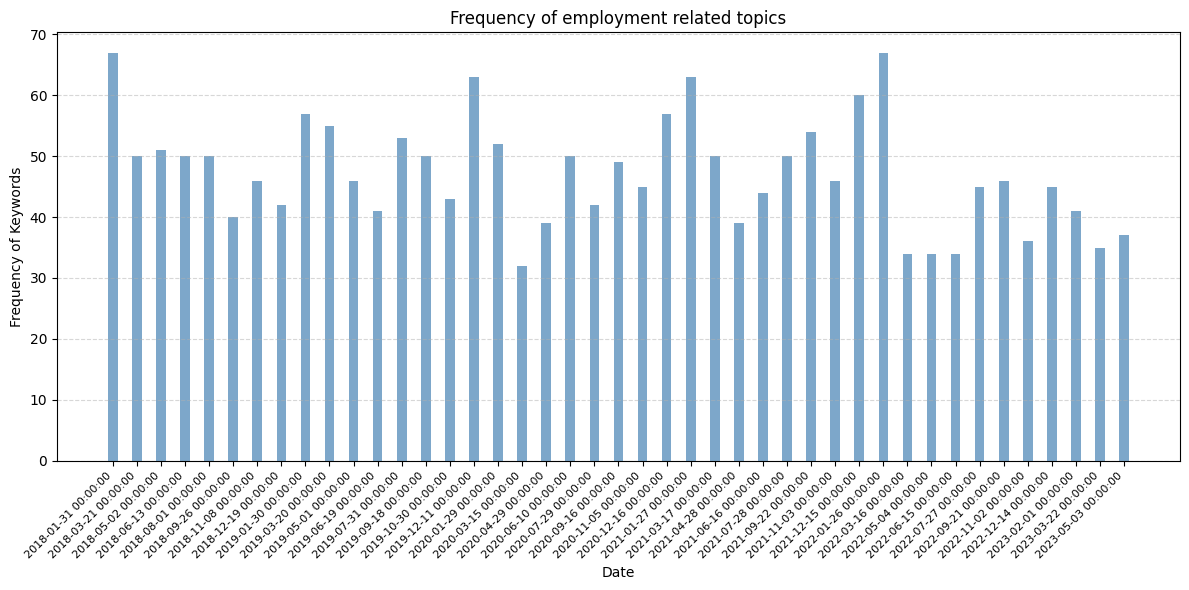

In [74]:
plot_keyword_frequency(df1, ["employment", "unemployment","labor market","jobs","job"])

/var/folders/r4/k_80bgh14hgf6lf0xrxfztjr0000gq/T/ipykernel_688/876459503.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords_count'] = df['clean_text'].apply(lambda text: count_keywords(text, keywords))
/var/folders/r4/k_80bgh14hgf6lf0xrxfztjr0000gq/T/ipykernel_688/876459503.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


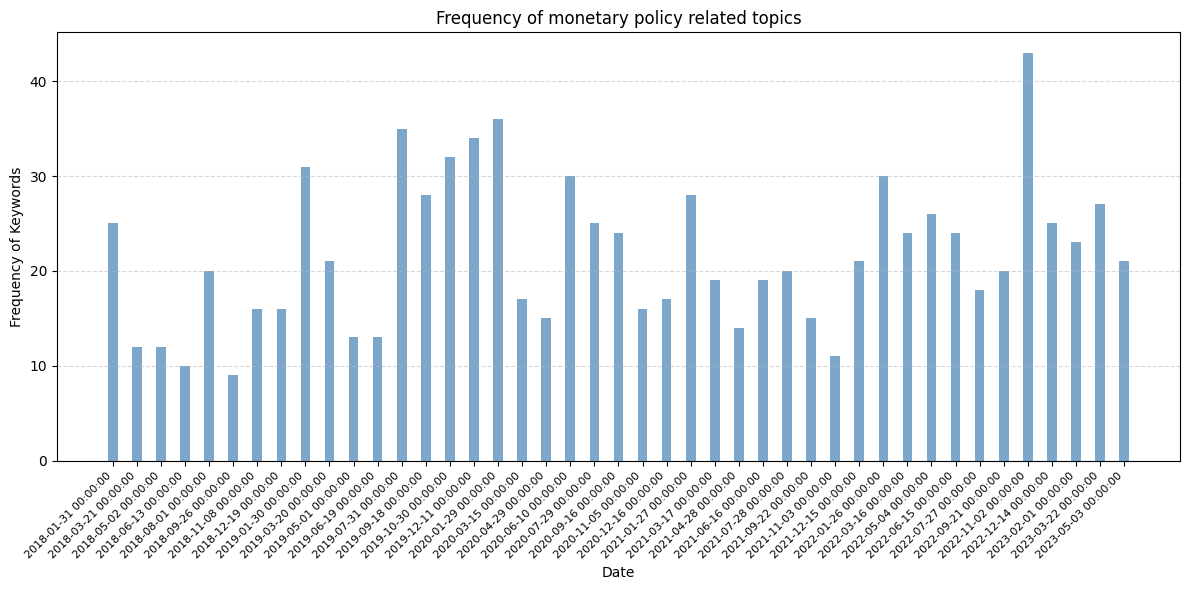

In [75]:
plot_keyword_frequency(df1, ["monetary policy"])

/var/folders/r4/k_80bgh14hgf6lf0xrxfztjr0000gq/T/ipykernel_688/876459503.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords_count'] = df['clean_text'].apply(lambda text: count_keywords(text, keywords))
/var/folders/r4/k_80bgh14hgf6lf0xrxfztjr0000gq/T/ipykernel_688/876459503.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


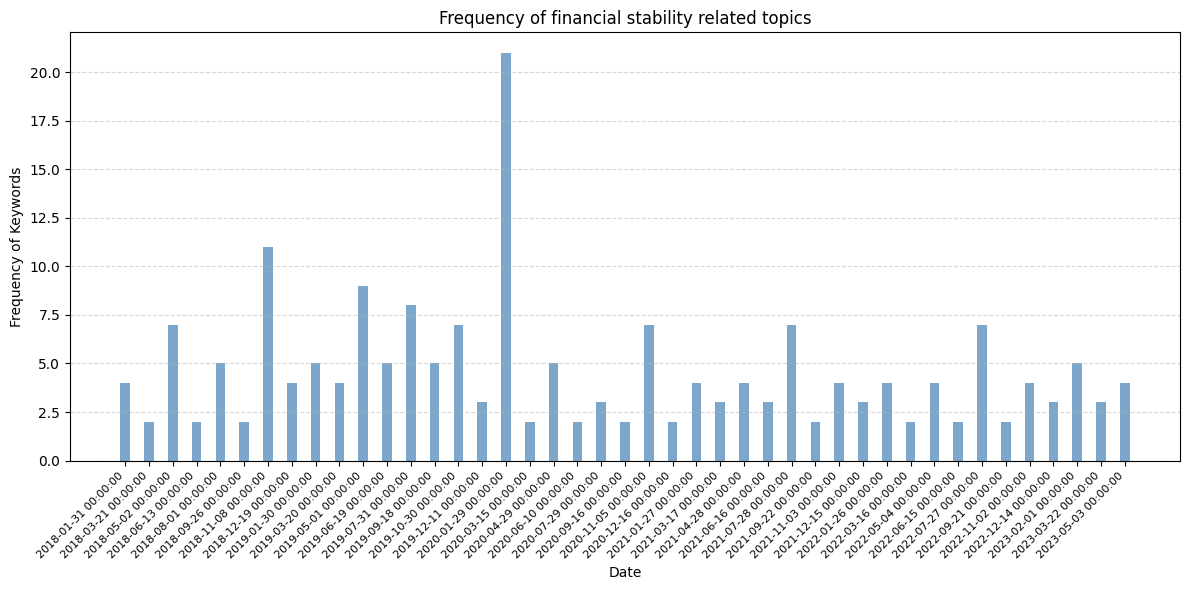

In [76]:
plot_keyword_frequency(df1, ["financial stability"])

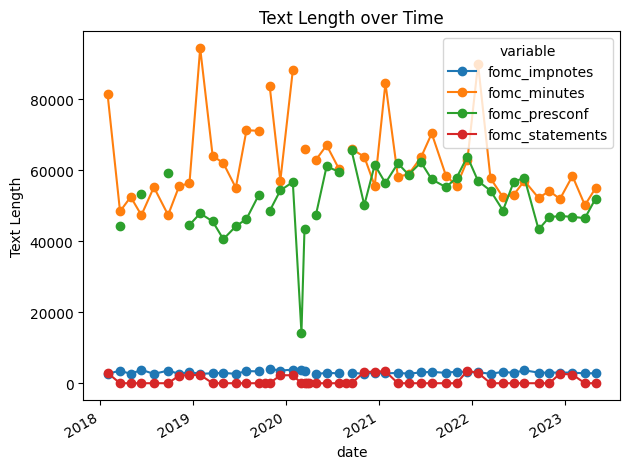

In [78]:
df['text_length'] = df['text'].apply(len)
df['sentence_length'] = df['text'].apply(lambda x: np.mean([len(sentence) for sentence in x.split('.')]))

# Create a pivot for both text_length and sentence_length
pivot_text_length = df.pivot(index='date', columns='variable', values='text_length')
pivot_sentence_length = df.pivot(index='date', columns='variable', values='sentence_length')

# Plotting text length
pivot_text_length.plot(kind='line', title='Text Length over Time', marker='o')
plt.ylabel('Text Length')

plt.tight_layout()
plt.show()


### Text length

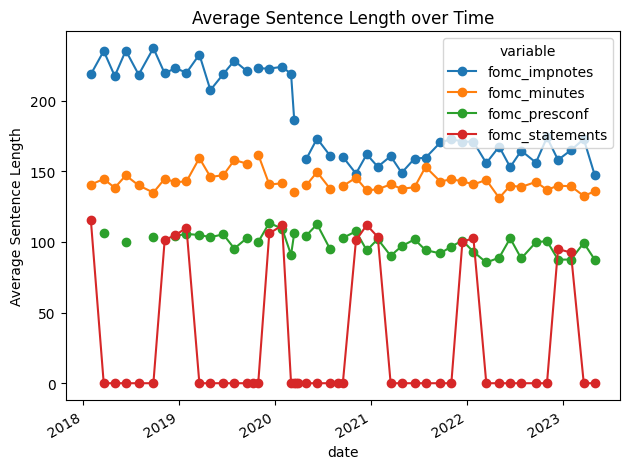

In [79]:
# Plotting average sentence length
pivot_sentence_length.plot(kind='line', title='Average Sentence Length over Time', marker='o')
plt.ylabel('Average Sentence Length')

plt.tight_layout()
plt.show()

### Text complexity

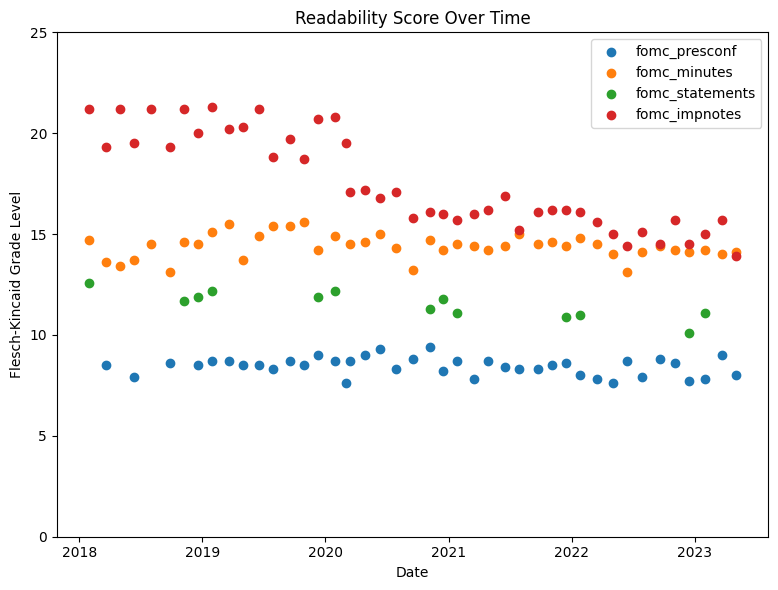

In [88]:
df['fk_grade'] = df['text'].apply(flesch_kincaid_grade)

# Plot the readability score over time
plt.figure(figsize=(8, 6))
for var in df['variable'].unique():
    subset = df[df['variable'] == var]
    plt.scatter(subset['date'], subset['fk_grade'], label=var)

plt.title('Readability Score Over Time')
plt.xlabel('Date')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.legend()

plt.tight_layout()
plt.ylim(0,25)
plt.show()